In [1]:
import pandas as pd
import numpy as np

In [2]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [3]:
df = pd.read_csv(r"C:\Users\soumyatm.694\Documents\Science\Om\Placement\placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df = df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

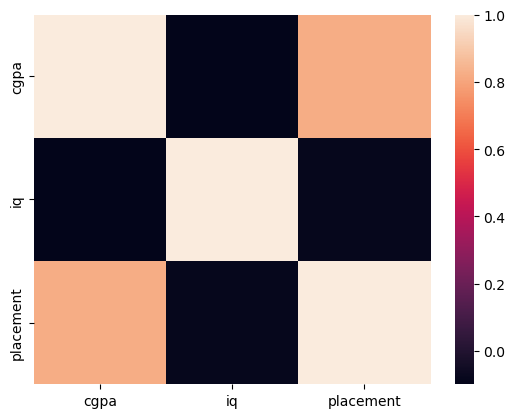

In [7]:
sns.heatmap(df.corr())
plt.show()

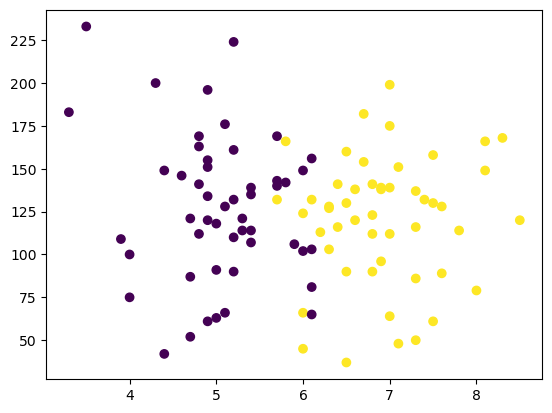

In [8]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [9]:
X = df.iloc[:,:2]
y = df['placement']

In [10]:
X.shape

(100, 2)

In [11]:
y.shape

(100,)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train ,y_test = train_test_split(X,y,test_size=0.1)

In [13]:
X_test.shape

(10, 2)

In [14]:
from sklearn.preprocessing import StandardScaler
Scaler  = StandardScaler()
X_train = Scaler.fit_transform(X_train)


In [15]:
X_test  = Scaler.transform(X_test)

In [16]:
X_test

array([[-1.13650904, -1.87921524],
       [-0.79036416, -1.52347438],
       [ 0.94036027, -1.98085549],
       [ 0.2480705 ,  0.05194946],
       [-0.9634366 , -0.15133104],
       [ 1.11343271, -0.25297128],
       [-1.3961177 ,  0.58556076],
       [-0.09807438, -0.5070719 ],
       [ 0.07499806,  0.76343119],
       [ 0.07499806, -1.14232345]])

In [17]:
#model train
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [18]:
y_pred = lr.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8

In [20]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

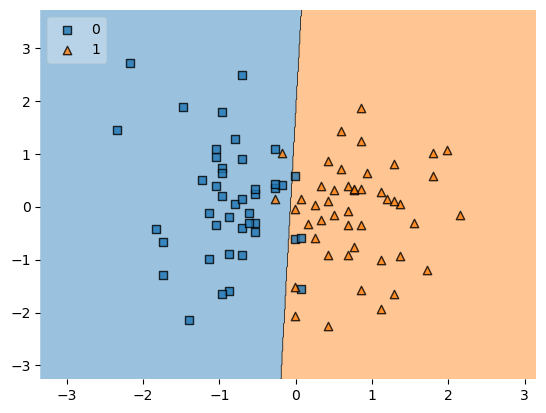

In [32]:
plot_decision_regions(X_train, y_train.values, clf = lr, legend=2)

In [33]:
#Dumping your model to a file for deployment
import pickle


In [36]:
pickle.dump(lr,open(r'C:\Users\soumyatm.694\Documents\Science\Om\LogicticRegression.pkl','wb'))